# Text Mining and Sentiment Analysis with NLTK and pandas in Python



## Data import

In [2]:
import pandas as pd

# Import some Tweets from Elon Musk 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@Albi_SideArms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyR6NAwap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@SawyerMerritt 🤣🤣


## Data transformation

In [3]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣


## Tokenization

- Install [NLTK](https://anaconda.org/anaconda/nltk): 

```bash
conda install -c anaconda nltk
```


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)

- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [4]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)


,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe, i, will]"
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, https, t, co, ueyr6nawap]"
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


## Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [5]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafaela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import nltk
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

- We use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to remove the stopwords:

In [7]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]"
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]"
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


## Remove infrequent words

- We remove words which occur less then two times. 
- Note that this operation changes the data format of our column `text_token` (notice the missing brackets).

In [8]:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …,albi_sidearms maybe
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,jack ueyr6nawap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣,sawyermerritt


## Lemmatization

- Next, we perfom [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation).

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/rafaela/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_token'] = df['text_token'].apply(wordnet_lem.lemmatize)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/Users/rafaela/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## Word cloud

- Install [wordcloud](https://amueller.github.io/word_cloud/):

```bash
conda install -c conda-forge wordcloud
```

- [Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [ ]:
all_words = ' '.join([word for word in df['text_token']])

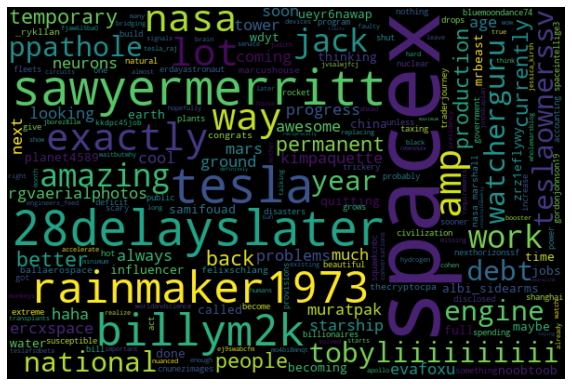

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

- Different style:

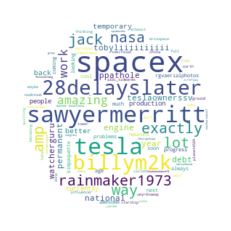

In [ ]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Frequency distributions

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

### Most common words

In [ ]:
fd.most_common(3)

[('spacex', 7), ('sawyermerritt', 5), ('tesla', 5)]

In [ ]:
fd.tabulate(3)

       spacex sawyermerritt         tesla 
            7             5             5 


### Plot common words

In [ ]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

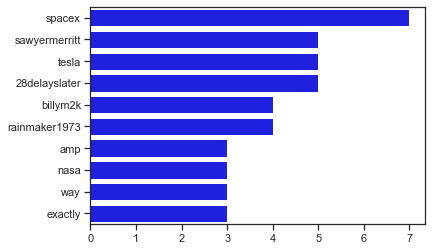

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Search specific words

In [ ]:
# Show frequency of a specific word
fd["nasa"]

3

## Sentiment analysis



### VADER lexicon

- NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for "Valence Aware Dictionary and Sentiment Reasoner" (Hutto & Gilbert, 2014).

In [ ]:
nltk.download('vader_lexicon')

NameError: name 'nltk' is not defined

### Sentiment 

### Sentiment Intensity Analyzer

- Initialize an object of `SentimentIntensityAnalyzer` with name "analyzer":

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores

- Use the `polarity_scores` method:

In [11]:
df['polarity'] = df['text_token'].apply(lambda x: analyzer.polarity_scores(x))
df.head(3)

#polarity erzeugt neue Spalten 

NameError: name 'analyzer' is not defined

### Transform data

In [ ]:
# Change data structure
df = pd.concat(
    [df.drop(['Unnamed: 0', 'id', 'author_id', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,created_at,text,text_token,neg,neu,pos,compound
0,2021-12-10T07:20:45.000Z,@albi_sidearms maybe i will …,albi_sidearms maybe,0.0,1.0,0.0,0.0
1,2021-12-10T07:19:05.000Z,@jack https://t.co/ueyr6nawap,jack ueyr6nawap,0.0,1.0,0.0,0.0
2,2021-12-10T06:44:19.000Z,@sawyermerritt 🤣🤣,sawyermerritt,0.0,1.0,0.0,0.0


In [ ]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,created_at,text,text_token,neg,neu,pos,compound,sentiment
0,2021-12-10T07:20:45.000Z,@albi_sidearms maybe i will …,albi_sidearms maybe,0.0,1.000,0.000,0.0000,neutral
1,2021-12-10T07:19:05.000Z,@jack https://t.co/ueyr6nawap,jack ueyr6nawap,0.0,1.000,0.000,0.0000,neutral
2,2021-12-10T06:44:19.000Z,@sawyermerritt 🤣🤣,sawyermerritt,0.0,1.000,0.000,0.0000,neutral
3,2021-12-10T04:42:00.000Z,@sawyermerritt tesla china has done amazing work,sawyermerritt tesla china done amazing work,0.0,0.568,0.432,0.5859,positive


### Analyze data

In [ ]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['2021-12-07T03:11:40.000Z',
       '@stocktalkweekly @neuralink i am definitely not saying that we can for sure do this, but i am increasingly confident that it is possible',
       'stocktalkweekly neuralink definitely saying sure increasingly confident possible',
       0.0, 0.379, 0.621, 0.802, 'positive'], dtype=object)

In [ ]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(['2021-12-08T21:04:14.000Z',
       '@watcherguru taxing all billionaires at 100% only drops national debt by ~10%, which is just one year of deficit spending',
       'watcherguru taxing billionaires 100 drops national debt one year deficit spending',
       0.366, 0.634, 0.0, -0.6369, 'negative'], dtype=object)

### Visualize data

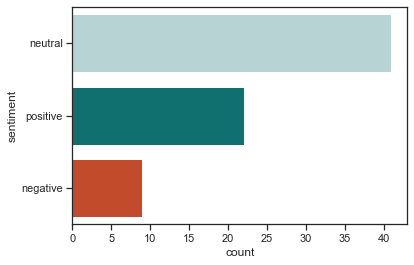

In [ ]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

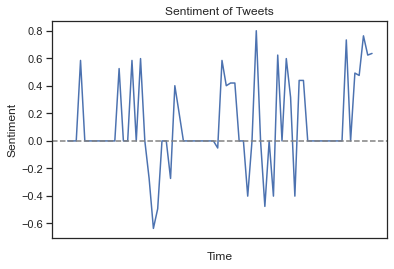

In [ ]:
# Lineplot
g = sns.lineplot(x='created_at', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

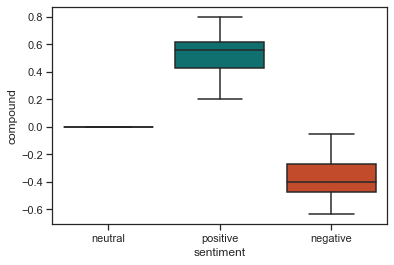

In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

Literature:

[Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)